Logistic Regression is a method based on classification. 
Linear Regression is converted to logistic Regression using Sigmoid Function.
It a binary classification which has 2 classes i.e., 0 & 1. LR gives the output in between 0 & 1 for any input value. 
0.5 is the cut off value. Below 0.5, it is class 0 and Above 0.5, it is class 1.
After training the logistic model. we need to evaluatethe model which can be done using Confusion Matrix.
Basic Terminologies of confusion Matrix are: TP ( True Positive ), TN ( True Negative ), FP ( False Positive ), FN ( False Negative )
FP & FN are known by Error-I and Error-II respectively.
TP means in Actual, result is Yes and predication is also Yes.
FP means in Actual, result is Yes and predication is No.

# Logistic Regression Part-1

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ca1d30eaf3304a8a8d7aa40858e46dee = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8HTHFT9jbivu_p-WvSdk486DeHUbAVzgYKBTIwO3iui2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ca1d30eaf3304a8a8d7aa40858e46dee.get_object(Bucket='machinelearninganddatascience-donotdelete-pr-abmfab337meh2g',Key='titanic_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


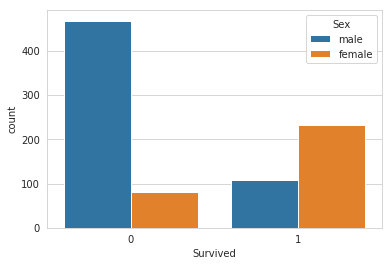

In [5]:
sns.set_style('whitegrid')
sns.countplot('Survived',data = train, hue='Sex')

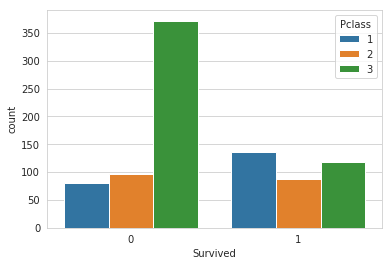

In [6]:
sns.countplot('Survived',data = train, hue='Pclass')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


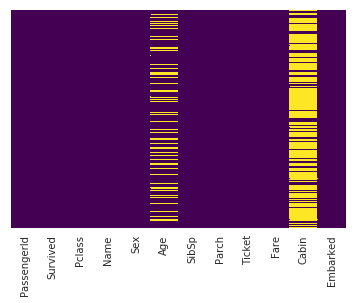

In [9]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False , cmap = 'viridis')

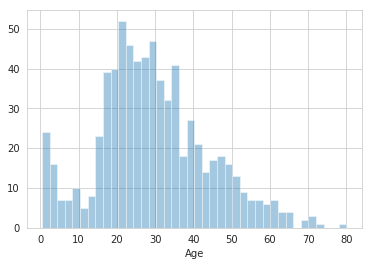

In [10]:
sns.distplot(train['Age'].dropna(), kde=False, bins = 40)                                               # dropna is for dropping NaN Values

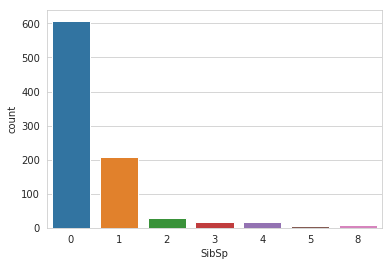

In [11]:
sns.countplot(x='SibSp', data=train)

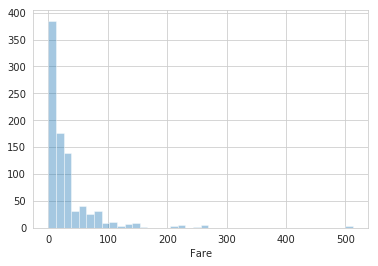

In [12]:
sns.distplot(train['Fare'], bins = 40, kde=False)

In [13]:
import cufflinks as cf

ModuleNotFoundError: No module named 'cufflinks'

In [ ]:
cf.go_offline()

In [ ]:
train['Fare'].iplot(kind = 'hist', bins=30)

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x='Pclass', y='Age', data=train)

In [ ]:
# There are not many NaN values in age column. So we can do just one thing , take the mean of age according to Pclass and Fill that NaN value with a
# mean value corresponding to the Pclass.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if (pd.isnull(Age)):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age , axis =1 )

In [ ]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False , cmap = 'viridis')

In [ ]:
# Now there are soo many NaN values in cabin column. So we can drop that column.

In [ ]:
train.drop('Cabin', axis = 1, inplace = True)

In [ ]:
train.head()

In [ ]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False , cmap = 'viridis')

In [ ]:
# Now we have one missing value in Embarked column
# So we can simply drop that missing value.

In [ ]:
train.dropna(inplace = True)

In [ ]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=False , cmap = 'viridis')

In [ ]:
# Now we have no missing value.

In [ ]:
train.head()

In [ ]:
# Now we have to change the categorical coulmns into machine learning language means in 0 & 1. So that ML Algorithm can be done over it.
# Turning the categorical coumns into 0 & 1 are k/s Dummies.

In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
sex.head()

In [ ]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)
embark.head()

In [ ]:
train = pd.concat([train, sex,embark], axis = 1)
train.head()

In [ ]:
# Now the columns Sex , Embarked, Name , Ticket, PassengerId  has no use

In [ ]:
train.drop(['Sex' , 'Embarked', 'Name' , 'Ticket', 'PassengerId' ],axis = 1, inplace = True)

In [ ]:
train.head()

In [ ]:
# Now all the data is numeric
# Take a look at Pclass which is also categorical but we are using it as numeric. Why?

# Below train dataset is used as a data

In [ ]:
train.columns

In [ ]:
x =train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y = train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(x_train,y_train)

In [ ]:
predictions = logmodel.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)